**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Spring 2021; Prof. V. F. de Almeida

# Xenon-135 Removal from Molten Salt Reactors by Helium Gas Bubbles
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

**Student(s):** Anadi Mondal, Anthony G. Bowers Jr. <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentor:**Prof. Subash L. Sharma 

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**27Mar2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Setup](#setup)
 + [Tests](#tests)
   - [1-D](#1d-test)
* [Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

- This project focuses on modeling and simulation of the transport and removal process of fission product Xe-135 by injection of Helium Bubbles in Molten Salt Reactors.

- Text... 

## [Problem Statement](#toc)<a id="problem"></a>

- Text... 

- Text... 

In [3]:
'''Domain'''

def show_domain(screenshot=False):
    import scipy.constants as unit
    unit.meter = 0.10
    unit.mm = unit.milli*unit.meter
    
    pipe_length = 1*unit.meter
    pipe_id = 3/4*unit.inch
    pipe_wall = 10*unit.mm
    pipe_od = pipe_id + 2*pipe_wall
    
    import pyvista as pv
    pv.set_plot_theme('paraview')
     
    radius_i = pipe_id/2
    radius_o = pipe_od/2
    fluid = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=pipe_length, radius=radius_i)
    tmp1 = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=pipe_length, radius=radius_o)
    tmp1 = tmp1.triangulate()
    tmp2 = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=pipe_length*1.1, radius=radius_i)
    tmp2 = tmp2.triangulate()
    tmp2.flip_normals()
    pipe = tmp1.boolean_cut(tmp2)

    plo = pv.Plotter(notebook=True,shape=(1,1)) 

    plo.subplot(0,0)
    plo.add_mesh(fluid, color='red', opacity=1,)
    plo.add_mesh(pipe, color='black', opacity=.99)
    plo.add_axes(xlabel='R', ylabel='Theta', zlabel='Z')
    
    cpos = plo.show(window_size=[800, 600])
    if screenshot:
        plo.screenshot('readme-domain.png')

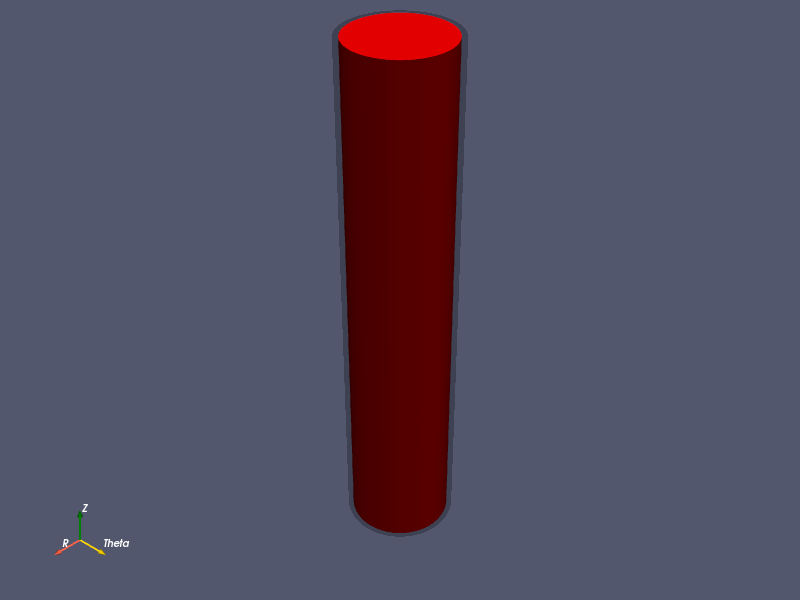

In [4]:
show_domain(screenshot=True)

## [Objectives](#toc)<a id="obj"></a>

- Text...

- Text...

## [Approach](#toc)<a id="app"></a>

- Text...

- Text...

## [Results and Analysis](#toc)<a id="ranalysis"></a>

- Text...

- Text...

## [Conclusions](#toc)<a id="conclusions"></a>

- Text...

- Text...

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [3] author, [reference]()
- [4] author, [reference]()